# 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

実行結果は別ファイル。

<br>**Pix2Pix**
<br>
<br>「条件画像と画像のペア」を学習データとしてその対応関係を学習するもの
<br>GeneratorとDiscriminatorがあり、
<br>Generatorは条件画像xとノイズベクトルzから画像G(x, z)を生成。
<br>Discriminatorは「条件画像xと実画像yのペア」と「条件画像xと生成画像G(x, z)のペア」がそれぞれ本物かどうかを識別。
<br>この構造によって、Generatorが条件画像から本物のような画像を生成できるように画像ペアの関係を学習。
<br>
<br>学習にかなり時間がかかり、５エポックではあまり綺麗な画像は生成できなかった。２０くらいは必要？
<br>


In [22]:
from sklearn.datasets import load_iris
import pdb

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 【問題3】Iris（二値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [56]:
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
label = iris.target
df = pd.DataFrame(data, columns=feature_names)
df["target"] = label
df = df[df["target"]!=2]

In [57]:
y = np_utils.to_categorical(df["target"])
X = df.iloc[:, 0:4]

In [58]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [61]:
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(train_x, train_y,
                    batch_size=10,
                    epochs=200,
                    verbose=1)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 22        
Total params: 292
Trainable params: 292
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 0s 2ms/sample - loss: 0.6733 - acc: 0.7250
Epoch 2/200
80/80 [============

80/80 [==============================] - 0s 322us/sample - loss: 2.7419e-05 - acc: 1.0000
Epoch 151/200
80/80 [==============================] - 0s 239us/sample - loss: 2.6924e-05 - acc: 1.0000
Epoch 152/200
80/80 [==============================] - 0s 263us/sample - loss: 2.6698e-05 - acc: 1.0000
Epoch 153/200
80/80 [==============================] - 0s 219us/sample - loss: 2.6416e-05 - acc: 1.0000
Epoch 154/200
80/80 [==============================] - 0s 240us/sample - loss: 2.6235e-05 - acc: 1.0000
Epoch 155/200
80/80 [==============================] - 0s 316us/sample - loss: 2.5775e-05 - acc: 1.0000
Epoch 156/200
80/80 [==============================] - 0s 302us/sample - loss: 2.5633e-05 - acc: 1.0000
Epoch 157/200
80/80 [==============================] - 0s 229us/sample - loss: 2.4985e-05 - acc: 1.0000
Epoch 158/200
80/80 [==============================] - 0s 209us/sample - loss: 2.4952e-05 - acc: 1.0000
Epoch 159/200
80/80 [==============================] - 0s 219us/sample - loss:

In [62]:
y_pred_proba = model.predict(test_x)

In [64]:
np.sum(np.argmax(y_pred_proba, axis=1)==np.argmax(test_y, axis=1))/len(y_pred_proba)

1.0

# 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [3]:
iris = load_iris()

In [4]:
data = iris.data
feature_names = iris.feature_names
label = iris.target

In [8]:
df = pd.DataFrame(data, columns=feature_names)
df["target"] = label

In [10]:
y = np_utils.to_categorical(df["target"])
X = df.iloc[:, 0:4]

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [24]:
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(train_x, train_y,
                    batch_size=10,
                    epochs=200,
                    verbose=1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 33        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
120/120 [============

120/120 [==============================] - 0s 180us/sample - loss: 0.0440 - acc: 0.9778
Epoch 149/200
120/120 [==============================] - 0s 144us/sample - loss: 0.0431 - acc: 0.9750
Epoch 150/200
120/120 [==============================] - 0s 176us/sample - loss: 0.0779 - acc: 0.9667
Epoch 151/200
120/120 [==============================] - 0s 198us/sample - loss: 0.0570 - acc: 0.9722
Epoch 152/200
120/120 [==============================] - 0s 167us/sample - loss: 0.0640 - acc: 0.9667
Epoch 153/200
120/120 [==============================] - 0s 208us/sample - loss: 0.0390 - acc: 0.9889
Epoch 154/200
120/120 [==============================] - 0s 202us/sample - loss: 0.0350 - acc: 0.9889
Epoch 155/200
120/120 [==============================] - 0s 181us/sample - loss: 0.0403 - acc: 0.9889
Epoch 156/200
120/120 [==============================] - 0s 236us/sample - loss: 0.0349 - acc: 0.9889
Epoch 157/200
120/120 [==============================] - 0s 211us/sample - loss: 0.0377 - acc: 0

In [41]:
y_pred_proba = model.predict(test_x)

In [43]:
np.sum(np.argmax(y_pred_proba, axis=1)==np.argmax(test_y, axis=1))/len(y_pred_proba)

1.0

# 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [71]:
from sklearn.preprocessing import StandardScaler

In [67]:
df = pd.read_csv('/Users/niikurasayaka/diveintocode-ml/Week3/data/train.csv')

In [69]:
y = df["SalePrice"]
y = np.log(np.array(y))
y = np.reshape(y, [-1, 1])
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
X = np.array(X)

In [72]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)
sc = StandardScaler()
sc.fit(train_x)
train_x = sc.transform(train_x)
test_x = sc.transform(test_x)

In [81]:
input_data = tf.keras.layers.Input(shape=(9,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation="linear")(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(loss="mean_squared_error",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(train_x, train_y,
                    batch_size=100,
                    epochs=80,
                    validation_data=(test_x, test_y))

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Train on 1168 samples, validate on 292 samples
Epoch 1/80
1168/1168 [==============================] - 0s 265us/sample - loss:

Epoch 50/80
1168/1168 [==============================] - 0s 21us/sample - loss: 0.0409 - acc: 0.0000e+00 - val_loss: 0.0410 - val_acc: 0.0000e+00
Epoch 51/80
1168/1168 [==============================] - 0s 23us/sample - loss: 0.0391 - acc: 0.0000e+00 - val_loss: 0.0431 - val_acc: 0.0000e+00
Epoch 52/80
1168/1168 [==============================] - 0s 22us/sample - loss: 0.0388 - acc: 0.0000e+00 - val_loss: 0.0398 - val_acc: 0.0000e+00
Epoch 53/80
1168/1168 [==============================] - 0s 21us/sample - loss: 0.0376 - acc: 0.0000e+00 - val_loss: 0.0389 - val_acc: 0.0000e+00
Epoch 54/80
1168/1168 [==============================] - 0s 23us/sample - loss: 0.0377 - acc: 0.0000e+00 - val_loss: 0.0432 - val_acc: 0.0000e+00
Epoch 55/80
1168/1168 [==============================] - 0s 22us/sample - loss: 0.0393 - acc: 0.0000e+00 - val_loss: 0.0367 - val_acc: 0.0000e+00
Epoch 56/80
1168/1168 [==============================] - 0s 22us/sample - loss: 0.0370 - acc: 0.0000e+00 - val_loss: 0.0419 

In [84]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [88]:
import matplotlib.pyplot as plt

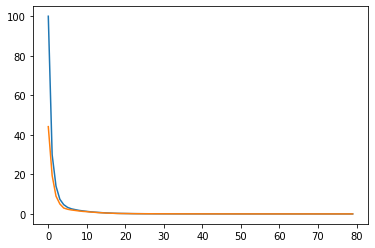

In [90]:
plt.plot(range(len(loss)), loss)
plt.plot(range(len(val_loss)), val_loss)

# 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [91]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [92]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) 

1.0
0.0


In [93]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 28, 28)
(12000, 28, 28)


In [123]:
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_val = np.reshape(X_val, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))

In [109]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Conv2D, Flatten, Dense,Dropout, Input
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras import Model
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import time
import os

In [128]:
input_data = Input(shape=(28, 28, 1))
x = Conv2D(filters = 32, kernel_size=(3, 3), strides=(1, 1), padding="same")(input_data)
x = Activation(activation = "relu")(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(filters = 64, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
x = Activation(activation = "relu")(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(64)(x)
x = Activation(activation = "relu")(x)
x = Dense(10)(x)
output = Activation(activation = "softmax")(x)

model = Model(inputs=input_data, outputs=output)

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer=SGD(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=5,
                    validation_data=(X_val, y_val))

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0   

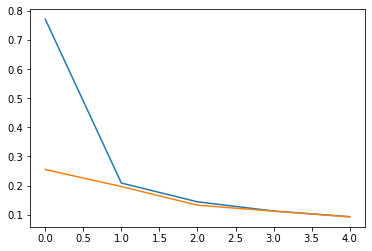

In [129]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(range(len(loss)), loss)
plt.plot(range(len(val_loss)), val_loss)

In [133]:
pred = model.predict(X_test)

In [137]:
np.sum(np.argmax(pred, axis=1)==np.argmax(y_test_one_hot, axis=1))/len(pred) 

0.9753